In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [12]:
df = pd.read_csv("housedata.csv")
df

,area,price
0,2600,550000
1,3000,680000
2,3400,970000
3,3800,1234560
4,4200,1566400
5,4600,1876570
6,5000,2109710


In [33]:
df['price'] = df['price'].astype(int)

In [15]:
df.price.describe().astype(int)

count          7
mean     1283891
std       594039
min       550000
25%       825000
50%      1234560
75%      1721485
max      2109710
Name: price, dtype: int32

In [16]:
import seaborn as sn

<Axes: xlabel='price', ylabel='Count'>

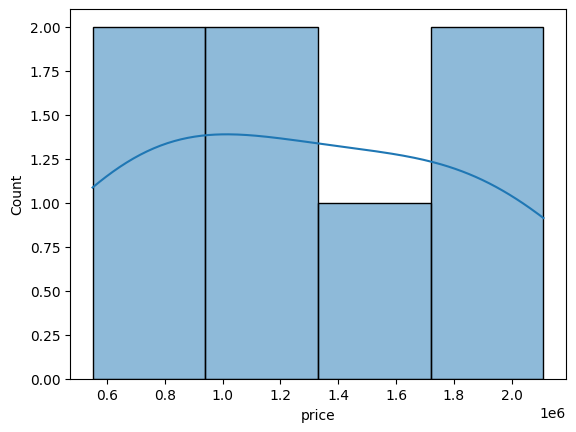

In [17]:
sn.histplot(df.price,kde=True)

In [18]:
df = pd.read_csv('bhp.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [19]:
df['price_per_sqft'].describe().astype(int)

count       13200
mean         7920
std        106727
min           267
25%          4267
50%          5438
75%          7317
max      12000000
Name: price_per_sqft, dtype: int32

In [20]:
percentile_99 = df.price_per_sqft.quantile(0.999)
percentile_01 = df.price_per_sqft.quantile(0.001)

In [21]:
df_new = df[(df.price_per_sqft>percentile_01) & (df.price_per_sqft<percentile_99)]
#df_new = df_new[df.price_per_sqft<percentile_99]

In [22]:
df_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [23]:
mean = df_new.price_per_sqft.mean()
std_dev = df_new.price_per_sqft.std()
std_dev
mean

6663.6537351958705

In [24]:
df_new_std  = df_new[(df.price_per_sqft<(mean+4*std_dev)) & (df.price_per_sqft>(mean-4*std_dev))]

C:\Users\10726620\AppData\Local\Temp\ipykernel_11712\97765220.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new_std  = df_new[(df.price_per_sqft<(mean+4*std_dev)) & (df.price_per_sqft>(mean-4*std_dev))]


In [25]:
df_new_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [26]:
df_new['z_score'] = (df_new.price_per_sqft-df_new.price_per_sqft.mean())/df_new.price_per_sqft.std()

C:\Users\10726620\AppData\Local\Temp\ipykernel_11712\4102744499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['z_score'] = (df_new.price_per_sqft-df_new.price_per_sqft.mean())/df_new.price_per_sqft.std()


In [27]:
df_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [28]:
df_new_zscore = df_new[(df_new.z_score<4)&(df_new.z_score>-4)]

In [29]:
df_new_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


<Axes: xlabel='price_per_sqft', ylabel='Count'>

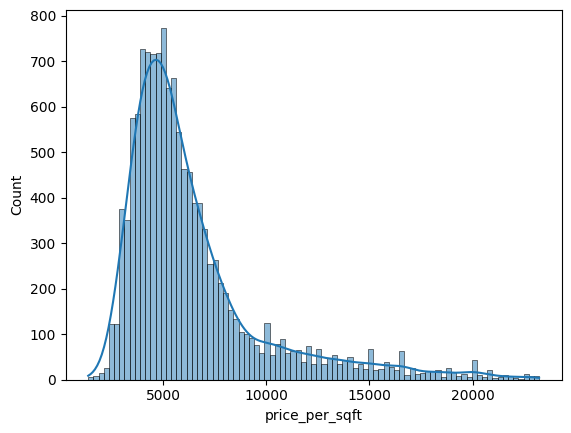

In [30]:
sn.histplot(df_new_std.price_per_sqft, kde=True)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

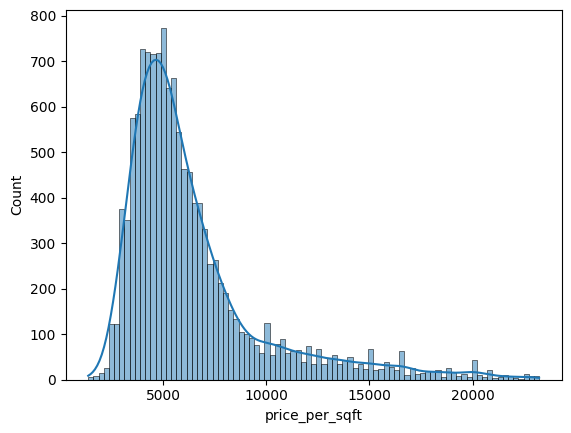

In [31]:
sn.histplot(df_new_zscore.price_per_sqft, kde=True)